In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [6]:
df=df.iloc[:,2:]

In [7]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [8]:
df.shape

(400, 3)

In [9]:
import seaborn as sns


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

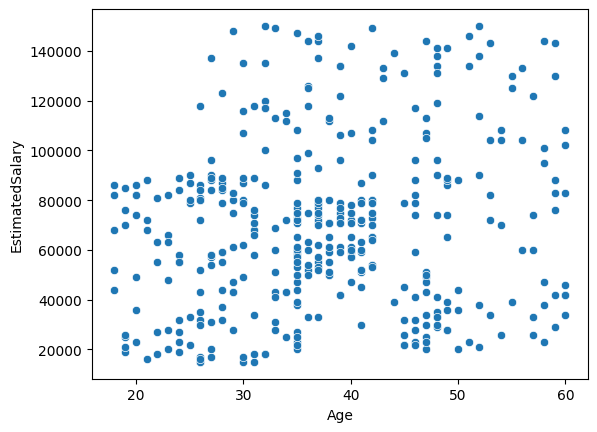

In [13]:
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])

In [16]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [17]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [18]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [20]:
y.sample(10)

,Purchased
290,1
11,0
350,1
286,0
392,1
112,0
88,0
269,0
201,0
206,1


In [21]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
model=Sequential()
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,verbose=0)

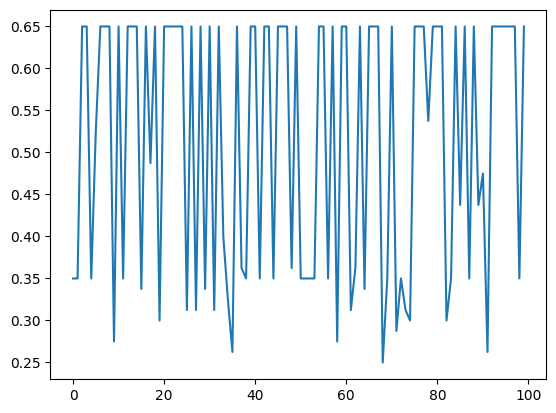

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

**Feature Scaling using Standard Scaler**

In [31]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Scaling is used to get small values from larger values for better training and it is used to improve accuracy

In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8502 - loss: 0.3813 - val_accuracy: 0.9125 - val_loss: 0.2684
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8348 - loss: 0.3786 - val_accuracy: 0.9375 - val_loss: 0.2544
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8436 - loss: 0.3805 - val_accuracy: 0.9375 - val_loss: 0.2426
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8817 - loss: 0.3328 - val_accuracy: 0.9500 - val_loss: 0.2322
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8602 - loss: 0.3307 - val_accuracy: 0.9625 - val_loss: 0.2238
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8716 - loss: 0.3222 - val_accuracy: 0.9750 - val_loss: 0.2175
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8823 - loss: 0.2985 - val_accuracy: 0.9750 - val_loss: 0.2118
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8762 - loss: 0.3275 - val_accuracy: 0.

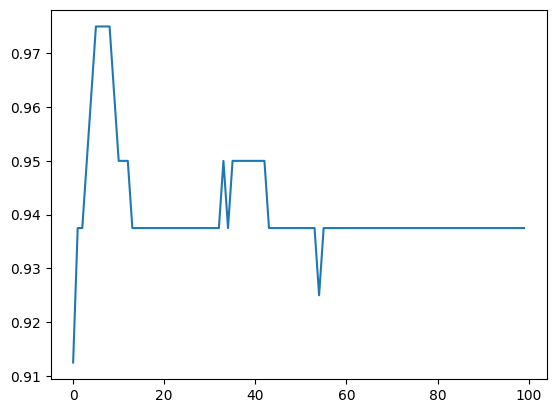

In [37]:
plt.plot(history.history['val_accuracy'])
plt.show()